In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import openpathsampling as paths
from openpathsampling.storage import Storage
storage = Storage("mistis.nc", "r")

In [2]:
mistis = storage.networks.load(0)

In [3]:
# this should be true if we restored correctly
for ens in mistis.sampling_transitions[0].ensembles:
    print ens in storage.ensembles[:], repr(ens)


True <openpathsampling.ensemble.TISEnsemble object at 0x10f150950>
True <openpathsampling.ensemble.TISEnsemble object at 0x10f815b10>
True <openpathsampling.ensemble.TISEnsemble object at 0x10f150150>


In [4]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (-0.3, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [5]:
movers = paths.MoveScheme(mistis)
movers.move_summary(storage)

repex ran 13.4328358209% of the cycles with acceptance 10/27 (0.37037037037) 
msouter_shooting ran 5.47263681592% of the cycles with acceptance 8/11 (0.727272727273) 
msouter_repex ran 3.48258706468% of the cycles with acceptance 2/7 (0.285714285714) 
pathreversal ran 22.3880597015% of the cycles with acceptance 32/45 (0.711111111111) 
shooting ran 51.2437810945% of the cycles with acceptance 75/103 (0.728155339806) 
minus ran 0.497512437811% of the cycles with acceptance 1/1 (1.0) 
msouter_pathreversal ran 2.98507462687% of the cycles with acceptance 6/6 (1.0) 


In [6]:
for trans in mistis.transitions.values():
    trans._flux = 1.0

In [7]:
mistis.rate_matrix(storage, force=True)

,"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [0.3, inf]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})"
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",0.4669794,1,NaN
"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})",NaN,NaN,0.05196408


In [8]:
trans = mistis.transitions.values()[0]
trans_hists = trans.histograms['max_lambda']

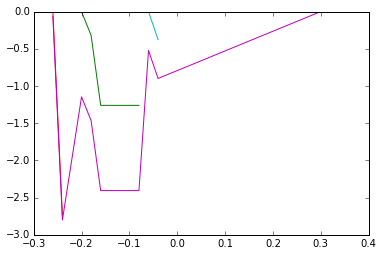

In [9]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x, np.log(trans.tcp))